<a href="https://colab.research.google.com/github/1EduardOrtega/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [210]:
url= "https://raw.githubusercontent.com/1EduardOrtega/TelecomX_LATAM/refs/heads/main/TelecomX_Data.json"
datos = pd.read_json(url)

datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Normalizamos el dataframe para poder trabajar mejor con los datos que este contiene y mejorar su visualizacion**

In [211]:
custome_normalziado = pd.json_normalize(datos['customer'])
phone_normalizado = pd.json_normalize(datos['phone'])
internet_normalizado = pd.json_normalize(datos['internet'])
account_normalizado = pd.json_normalize(datos['account'])

df_normalizado = pd.concat([datos[['customerID', 'Churn']], custome_normalziado, phone_normalizado, internet_normalizado, account_normalizado], axis=1)

df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

Verificamos el tipo de datos que pertenece a cada columna

In [212]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


como podemos ver Charges.Total esta como object por lo que es necesario convertirlo a un tipo float ya que es una columna con numeros, siendo la que
representa los costos totales de los servicios de cada cliente

In [213]:
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Verificamos si existen datos nulos es Charges.Total, sin embargo igualmente verificamos si esos datos nulos pertenecen a clientes nuevos, esto con ayuda
de la columna tenure la cual representa los meses de cada cliente con los servicios

In [214]:
valores_nulos = df_normalizado[df_normalizado['Charges.Total'].isnull()]

df_normalizado[df_normalizado['Charges.Total'].isnull() & (df_normalizado['tenure'] == 0)]
nuevos_clientes_sin_cargo = df_normalizado[(df_normalizado['Charges.Total'].isnull()) & (df_normalizado['tenure'] == 0)]
print(f"Registros con TotalCharges nulo y tenure = 0: {len(nuevos_clientes_sin_cargo)}")


Registros con TotalCharges nulo y tenure = 0: 11


Como se puede observar existen datos nulos en Charges.Total sin embargo estos si
pertenecen a clientes nuevos, por lo que son datos que igual son validos ya que
un cliente nuevo no puede tener cargos aun, por lo que tratamos los datos nulos
en Charges.Total agregando 0.0

In [215]:
df_normalizado.loc[(df_normalizado['Charges.Total'].isnull()) & (df_normalizado['tenure'] == 0), 'Charges.Total'] = 0.0

In [216]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


**Procedemos a verificar si existen duplicados en la columna customerID**

In [217]:
df_normalizado['customerID'].duplicated().sum()


np.int64(0)

dato que customerID no tiene datos nulos, procedemos
a verificar si existen datos nullos en la columna Churn **texto en negrita**

In [218]:
print(df_normalizado['Churn'].value_counts(dropna=False))

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


**Como se puede observar existen 224 datos nulos en Churn, mismo que no tienen datos de "Yes" o "No" por lo que no es posible conocer ele status de esos clientes, por lo cual procedemos a descartar esos datos ya que no pueden ser de utilidad para el analisis**

In [219]:
df_normalizado['Churn'] = df_normalizado['Churn'].astype(str)
df_normalizado = df_normalizado[
    (df_normalizado['Churn'].str.strip() != '') &
    (df_normalizado['Churn'].str.lower().str.strip() != 'nan')
]

print(df_normalizado['Churn'].value_counts(dropna=False))


Churn
No     5174
Yes    1869
Name: count, dtype: int64


Para continuar con el tratamiento de datos convertimos las columnas que contienen "Yes" o "No" al tipo binario agregando 1 cuando es Yes y 0 cuando es No, con esto vamos preparando los datos

por igual aplicamos un One-Hot Encoding a las columnas categoricas que tenemos en el dataframe


In [220]:

df_modelo = df_normalizado.copy()

df_modelo.drop(columns=['customerID'], inplace=True)


binary_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'MultipleLines'
]

df_modelo = pd.get_dummies(df_modelo, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

for col in binary_cols:
    df_modelo[col] = df_modelo[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    df_modelo[col] = df_modelo[col].map({'Yes': 1, 'No': 0})

print(df_modelo.info())


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   gender                                 7043 non-null   object 
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   MultipleLines                          7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  TechSuppo

In [221]:
df_modelo.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,Charges.Monthly,Charges.Total,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Female,0,1,1,9,1,0,0,1,...,1,65.6,593.30,False,False,True,False,False,False,True
1,0,Male,0,0,0,9,1,1,0,0,...,0,59.9,542.40,False,False,False,False,False,False,True
2,1,Male,0,0,0,4,1,0,0,0,...,1,73.9,280.85,True,False,False,False,False,True,False
3,1,Male,1,1,0,13,1,0,0,1,...,1,98.0,1237.85,True,False,False,False,False,True,False
4,1,Female,1,1,0,3,1,0,0,0,...,1,83.9,267.40,True,False,False,False,False,False,True


Como podemos observar despues del One-Hot Encoding contamos con otras columnas de datos los cuales contienen datos de "True" o "False", para poder trabajar mejor con estas columnas las transformamos a binario tambien

In [222]:
cols_binarias = [
    'InternetService_Fiber optic',
    'InternetService_No',
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

df_modelo[cols_binarias] = df_modelo[cols_binarias].astype(int)

df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   gender                                 7043 non-null   object 
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   MultipleLines                          7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  TechSuppo

Teniendo ya el dataframe con los datos trabajados, procedemos a verificar la
correlacion de las columnas con la columna Churn

In [223]:
correlaciones = df_modelo.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
print(correlaciones)



Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Charges.Monthly                          0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService                             0.011942
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_One year                       -0.177820
Charges.Total                           -0.198324


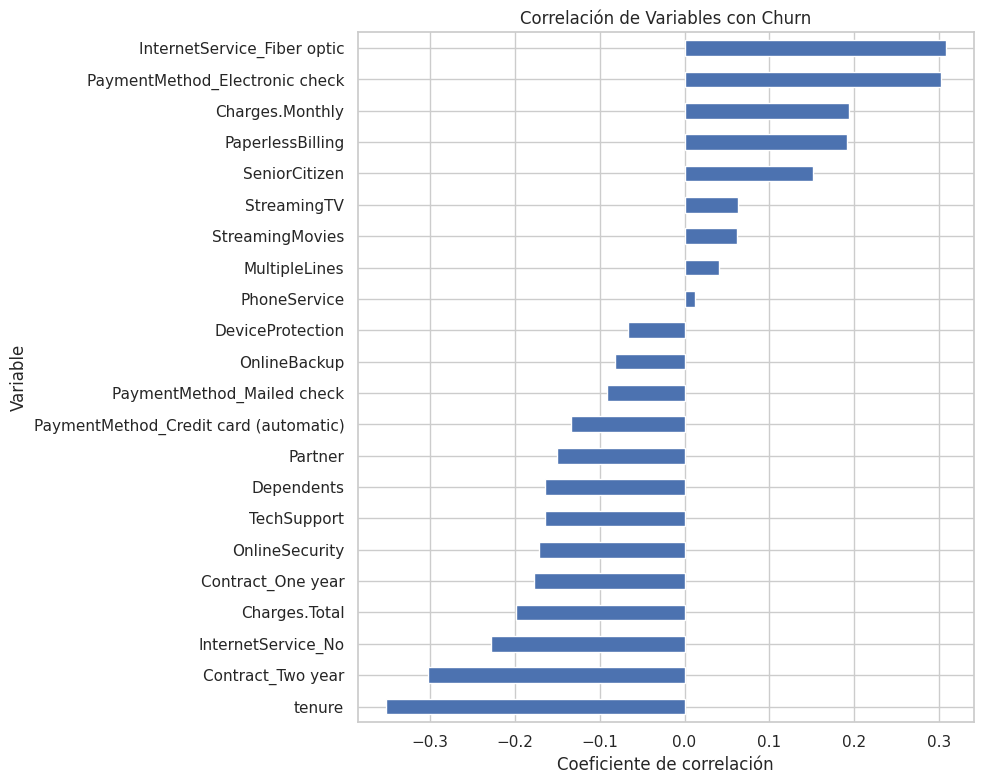

In [224]:
#Graficamos para poder hacer mas visible los resultados
correlaciones.drop('Churn').sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title('Correlación de Variables con Churn')
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Variable')
plt.grid(True)
plt.tight_layout()
plt.show()


Como se puede observar existen columnas que pueden ser de importancia para el
analisis como lo es InternetService_Fiber optic ya que al parecer los clientes
con este servicio tienden a tener una mayor evacion por lo que podria implicar una insatisfaccion en el servicio o costo

por igual podemos notar que PaymentMethod_Electronic check es el metodo de pago
que presenta mayor evacion de clientes


In [225]:

df_modelo.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,Charges.Monthly,Charges.Total,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Female,0,1,1,9,1,0,0,1,...,1,65.6,593.30,0,0,1,0,0,0,1
1,0,Male,0,0,0,9,1,1,0,0,...,0,59.9,542.40,0,0,0,0,0,0,1
2,1,Male,0,0,0,4,1,0,0,0,...,1,73.9,280.85,1,0,0,0,0,1,0
3,1,Male,1,1,0,13,1,0,0,1,...,1,98.0,1237.85,1,0,0,0,0,1,0
4,1,Female,1,1,0,3,1,0,0,0,...,1,83.9,267.40,1,0,0,0,0,0,1


**Procedemos a crear la columna de cuentas diarias**

In [226]:
df_modelo['Cuentas_Diarias'] = df_modelo['Charges.Monthly'] / 30
print(df_modelo[['Charges.Monthly', 'Cuentas_Diarias']].head())
df_modelo.head()

   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Charges.Monthly,Charges.Total,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,0,1,...,65.6,593.30,0,0,1,0,0,0,1,2.186667
1,0,Male,0,0,0,9,1,1,0,0,...,59.9,542.40,0,0,0,0,0,0,1,1.996667
2,1,Male,0,0,0,4,1,0,0,0,...,73.9,280.85,1,0,0,0,0,1,0,2.463333
3,1,Male,1,1,0,13,1,0,0,1,...,98.0,1237.85,1,0,0,0,0,1,0,3.266667
4,1,Female,1,1,0,3,1,0,0,0,...,83.9,267.40,1,0,0,0,0,0,1,2.796667


Para un posterior mejor manejo de los datos procedemos a hacer la traduccion al español de las columnas

In [227]:
df_modelo.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'TienePareja',
    'Dependents': 'TieneDependientes',
    'tenure': 'MesesCliente',
    'PhoneService': 'SuscripcionTelefono',
    'MultipleLines': 'LineasMultiples',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'TVCable',
    'StreamingMovies': 'PeliculasStreaming',
    'PaperlessBilling': 'FacturaDigital',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'InternetService_Fiber optic': 'Internet_Fibra',
    'InternetService_No': 'SinInternet',
    'Contract_One year': 'Contrato_1Año',
    'Contract_Two year': 'Contrato_2Años',
    'PaymentMethod_Credit card (automatic)': 'Pago_TarjetaCredito(automatico)',
    'PaymentMethod_Electronic check': 'Pago_ChequeElectronico',
    'PaymentMethod_Mailed check': 'Pago_ChequeFisico',
    'Churn': 'Evasion'
}, inplace=True)


In [228]:
df_modelo.head()

,Evasion,Genero,AdultoMayor,TienePareja,TieneDependientes,MesesCliente,SuscripcionTelefono,LineasMultiples,SeguridadOnline,RespaldoOnline,...,CargoMensual,CargoTotal,Internet_Fibra,SinInternet,Contrato_1Año,Contrato_2Años,Pago_TarjetaCredito(automatico),Pago_ChequeElectronico,Pago_ChequeFisico,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,0,1,...,65.6,593.30,0,0,1,0,0,0,1,2.186667
1,0,Male,0,0,0,9,1,1,0,0,...,59.9,542.40,0,0,0,0,0,0,1,1.996667
2,1,Male,0,0,0,4,1,0,0,0,...,73.9,280.85,1,0,0,0,0,1,0,2.463333
3,1,Male,1,1,0,13,1,0,0,1,...,98.0,1237.85,1,0,0,0,0,1,0,3.266667
4,1,Female,1,1,0,3,1,0,0,0,...,83.9,267.40,1,0,0,0,0,0,1,2.796667


In [229]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Evasion                          7043 non-null   int64  
 1   Genero                           7043 non-null   object 
 2   AdultoMayor                      7043 non-null   int64  
 3   TienePareja                      7043 non-null   int64  
 4   TieneDependientes                7043 non-null   int64  
 5   MesesCliente                     7043 non-null   int64  
 6   SuscripcionTelefono              7043 non-null   int64  
 7   LineasMultiples                  7043 non-null   int64  
 8   SeguridadOnline                  7043 non-null   int64  
 9   RespaldoOnline                   7043 non-null   int64  
 10  ProteccionDispositivo            7043 non-null   int64  
 11  SoporteTecnico                   7043 non-null   int64  
 12  TVCable                  

#📊 Carga y análisis

Iniciando con el analisis procedemos a verificar los datos estadisticos de nuestro dataframe

In [230]:
df_modelo.describe()

,Evasion,AdultoMayor,TienePareja,TieneDependientes,MesesCliente,SuscripcionTelefono,LineasMultiples,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,...,CargoMensual,CargoTotal,Internet_Fibra,SinInternet,Contrato_1Año,Contrato_2Años,Pago_TarjetaCredito(automatico),Pago_ChequeElectronico,Pago_ChequeFisico,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2279.734304,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2266.794470,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3786.600000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


**Verificamos la desviacion estandar**

In [231]:
df_modelo.std(numeric_only=True)

,0
Evasion,0.441561
AdultoMayor,0.368612
TienePareja,0.499748
TieneDependientes,0.458110
MesesCliente,24.559481
SuscripcionTelefono,0.295752
LineasMultiples,0.493888
SeguridadOnline,0.452237
RespaldoOnline,0.475363
ProteccionDispositivo,0.475038


Visualizamos la mediana

In [232]:
df_modelo.median(numeric_only=True)

,0
Evasion,0.000
AdultoMayor,0.000
TienePareja,0.000
TieneDependientes,0.000
MesesCliente,29.000
SuscripcionTelefono,1.000
LineasMultiples,0.000
SeguridadOnline,0.000
RespaldoOnline,0.000
ProteccionDispositivo,0.000


In [233]:
df_modelo.min(numeric_only=True)
df_modelo.max(numeric_only=True)

,0
Evasion,1.000000
AdultoMayor,1.000000
TienePareja,1.000000
TieneDependientes,1.000000
MesesCliente,72.000000
SuscripcionTelefono,1.000000
LineasMultiples,1.000000
SeguridadOnline,1.000000
RespaldoOnline,1.000000
ProteccionDispositivo,1.000000


In [234]:
df_modelo.nunique()

,0
Evasion,2
Genero,2
AdultoMayor,2
TienePareja,2
TieneDependientes,2
MesesCliente,73
SuscripcionTelefono,2
LineasMultiples,2
SeguridadOnline,2
RespaldoOnline,2


Con los datos ya listo iniciamos verificando la proporcion de evasión en el dataframe

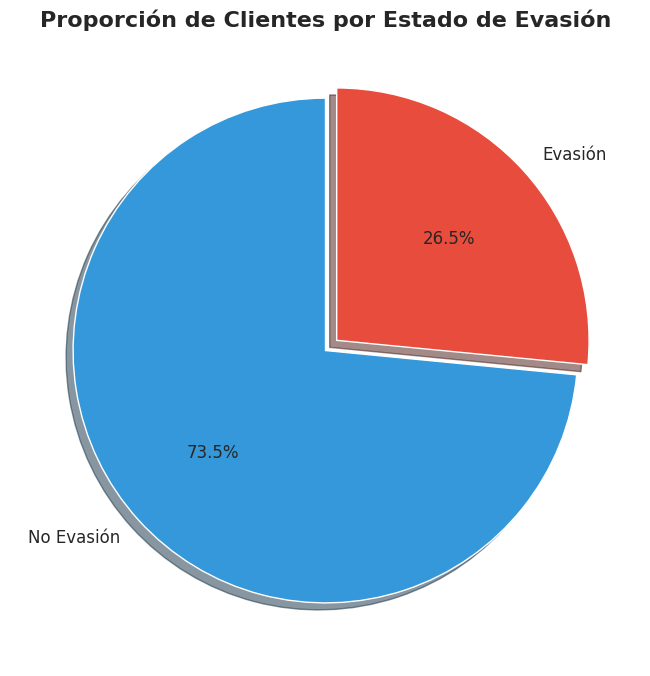

In [235]:

plt.style.use('ggplot')
sns.set(font_scale=1.2)
custom_colors = ['#3498db', '#e74c3c']
labels = ['No Evasión', 'Evasión']
counts = df_modelo['Evasion'].value_counts()

explode = (0, 0.06)

plt.figure(figsize=(7, 7))
plt.pie(counts.values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Proporción de Clientes por Estado de Evasión', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Podemos observar el porcentaje de evacion que existe, el cual corresponde a un 26.5% de los clientes registrados. En base a esto procedemos a analizar mas a fondo la evacion en base a algunas caracteristicas.

Verificaremos la proporcion de evacion en base al genero de cada cliente

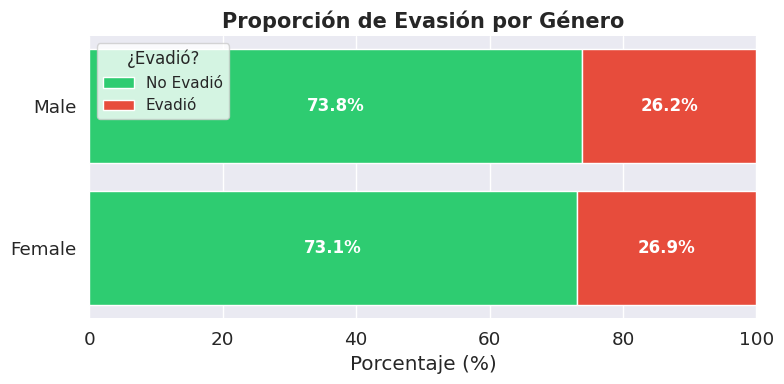

In [236]:


df_grafico = df_modelo.copy()
df_grafico['Evasion'] = df_grafico['Evasion'].map({0: 'No', 1: 'Sí'})

evasion_genero = (
    df_grafico.groupby(['Genero', 'Evasion'])
    .size()
    .reset_index(name='Conteo')
    .pivot(index='Genero', columns='Evasion', values='Conteo')
    .fillna(0)
)


evasion_genero['Total'] = evasion_genero.sum(axis=1)
evasion_genero['% No'] = (evasion_genero['No'] / evasion_genero['Total']) * 100
evasion_genero['% Sí'] = (evasion_genero['Sí'] / evasion_genero['Total']) * 100


fig, ax = plt.subplots(figsize=(8, 4))
sns.set(style="whitegrid")


colors = ['#2ecc71', '#e74c3c']  # Verde para No, Rojo para Sí


ax.barh(evasion_genero.index, evasion_genero['% No'], color=colors[0], label='No Evadió')
ax.barh(evasion_genero.index, evasion_genero['% Sí'], left=evasion_genero['% No'], color=colors[1], label='Evadió')


ax.set_xlim(0, 100)
ax.set_xlabel('Porcentaje (%)')
ax.set_title('Proporción de Evasión por Género', fontsize=15, weight='bold')
ax.legend(title='¿Evadió?')
sns.despine(left=True, bottom=True)


for i, genero in enumerate(evasion_genero.index):
    no_pct = evasion_genero.loc[genero, '% No']
    si_pct = evasion_genero.loc[genero, '% Sí']
    ax.text(no_pct / 2, i, f'{no_pct:.1f}%', va='center', ha='center', color='white', weight='bold')
    ax.text(no_pct + (si_pct / 2), i, f'{si_pct:.1f}%', va='center', ha='center', color='white', weight='bold')

plt.tight_layout()
plt.show()


Es posible observar la proporcion de evacion por genero, que como es visible tanto el porcentaje de hombre y mujeres que evaden es similar por lo que no se puede ver que esto sea un factor.

Procederemos a analizar el porcentaje de evacion por tipo de contrato que tiene cada cliente

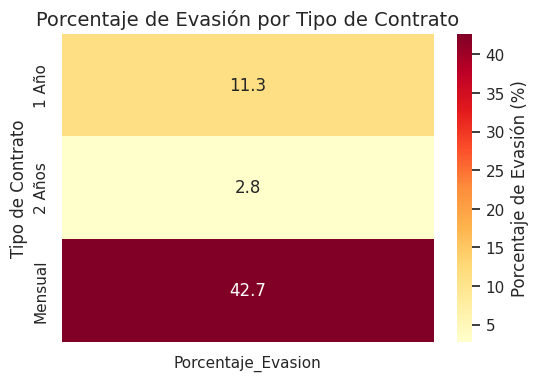

In [237]:
df_grafico = df_modelo.copy()
df_grafico['TipoContrato'] = df_grafico.apply(
    lambda x: '1 Año' if x['Contrato_1Año'] == 1
    else '2 Años' if x['Contrato_2Años'] == 1
    else 'Mensual', axis=1
)

pivot_table = df_grafico.pivot_table(
    index='TipoContrato',
    columns='Evasion',
    aggfunc='size',
    fill_value=0
)

pivot_table['Porcentaje_Evasion'] = (
    pivot_table[1] / pivot_table.sum(axis=1) * 100
).round(1)

heatmap_data = pivot_table[['Porcentaje_Evasion']]

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Porcentaje de Evasión (%)'})
plt.title('Porcentaje de Evasión por Tipo de Contrato', fontsize=14)
plt.ylabel('Tipo de Contrato')
plt.xlabel('')
plt.show()


Con esto podemos notar que los clientes que tienen contratos mensuales tienden a tener una mayor evasión por lo que es necesario determinar las razones de esto, ya sea por un menor compromiso o costos de los servicios.
Por igual vemos que los clientes con contratos de 2 años son las que menos tienden a evadir ya sea por la antigüedad o los servicios que utilizan.

Procedemos a conocer mejor los datos de evacion analizando la relacion con los tipo de pagos


In [238]:

def obtener_metodo_pago(row):
    if row['Pago_TarjetaCredito(automatico)'] == 1:
        return 'Tarjeta Crédito (Automático)'
    elif row['Pago_ChequeElectronico'] == 1:
        return 'Cheque Electrónico'
    elif row['Pago_ChequeFisico'] == 1:
        return 'Cheque Físico'
    else:
        return 'Otro'

df_grafico['MetodoPago'] = df_grafico.apply(obtener_metodo_pago, axis=1)

resumen_pago = (
    df_grafico.groupby('MetodoPago')['Evasion']
    .agg(
        Total_Clientes='count',
        Total_Evaden=lambda x: (x == 1).sum()
    )
    .reset_index()
)

resumen_pago['Porcentaje_Evasion'] = (
    resumen_pago['Total_Evaden'] / resumen_pago['Total_Clientes'] * 100
).round(1)

resumen_pago = resumen_pago.sort_values(by='Porcentaje_Evasion', ascending=False)

print(resumen_pago)


                     MetodoPago  Total_Clientes  Total_Evaden  \
0            Cheque Electrónico            2365          1071   
1                 Cheque Físico            1612           308   
2                          Otro            1544           258   
3  Tarjeta Crédito (Automático)            1522           232   

   Porcentaje_Evasion  
0                45.3  
1                19.1  
2                16.7  
3                15.2  


Como podemos observar un 45.3% de los clientes que realizan pagos con cheques electronicos tienen a evadir, contrario a los que pagan con tarjeta de credito que son los que menos porcentaje tienen. Graficaremos los resultados para poder observar mejor

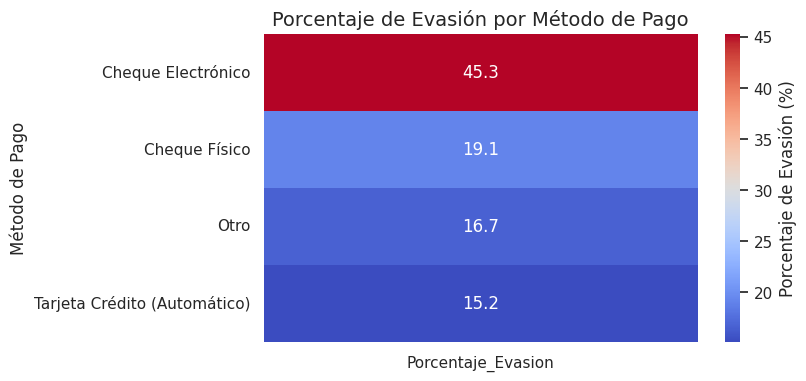

In [239]:
def obtener_metodo_pago(row):
    if row['Pago_TarjetaCredito(automatico)'] == 1:
        return 'Tarjeta Crédito (Automático)'
    elif row['Pago_ChequeElectronico'] == 1:
        return 'Cheque Electrónico'
    elif row['Pago_ChequeFisico'] == 1:
        return 'Cheque Físico'
    else:
        return 'Otro'

df_grafico['MetodoPago'] = df_grafico.apply(obtener_metodo_pago, axis=1)

pivot_pago = df_grafico.pivot_table(
    index='MetodoPago',
    columns='Evasion',
    aggfunc='size',
    fill_value=0
)

pivot_pago['Porcentaje_Evasion'] = (
    pivot_pago[1] / pivot_pago.sum(axis=1) * 100
).round(1)

heatmap_pago = pivot_pago[['Porcentaje_Evasion']]

plt.figure(figsize=(7,4))
sns.heatmap(
    heatmap_pago.sort_values('Porcentaje_Evasion', ascending=False),
    annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Porcentaje de Evasión (%)'}
)
plt.title('Porcentaje de Evasión por Método de Pago', fontsize=14)
plt.ylabel('Método de Pago')
plt.xlabel('')
plt.show()


Ahora procedemos a verificar la relacion de la evacion con el tipo de internet
que tiene cada cliente para poder determinar si es un factor importante

In [240]:
def tipo_internet(row):
    if row['Internet_Fibra']:
        return 'Fibra Óptica'
    elif row['SinInternet']:
        return 'Sin Internet'
    else:
        return 'DSL'

df_grafico['TipoInternet'] = df_grafico.apply(tipo_internet, axis=1)

tasa_evasion_internet = (
    df_grafico.groupby('TipoInternet')['Evasion']
    .mean()
    .reset_index()
)

tasa_evasion_internet['Tasa de Evasión (%)'] = tasa_evasion_internet['Evasion'] * 100

fig = px.bar(
    tasa_evasion_internet,
    x='TipoInternet',
    y='Tasa de Evasión (%)',
    color='TipoInternet',
    text='Tasa de Evasión (%)',
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='Tasa de Evasión según Tipo de Internet',
    labels={'TipoInternet': 'Tipo de Internet', 'Tasa de Evasión (%)': 'Tasa de Evasión (%)'}
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='white',
    font=dict(size=14),
    showlegend=False
)

fig.show()


Como podemos observar los clientes que tienen un servicios de fibra optica tienden a evadir con mayor porcentaje de evacion, este porcentaje es muy alto referente a los demas por lo que puede ser necesario verificar el servicio


Ahora verificamos la evacion con relacion si el cliente es adulto mayor o no

In [241]:
conteo = df_modelo.groupby(['AdultoMayor', 'Evasion']).size().reset_index(name='count')

total_por_grupo = conteo.groupby('AdultoMayor')['count'].transform('sum')
conteo['pct'] = conteo['count'] / total_por_grupo * 100

conteo['AdultoMayor'] = conteo['AdultoMayor'].map({0: 'No Adulto Mayor', 1: 'Adulto Mayor'})
conteo['Evasion'] = conteo['Evasion'].map({0: 'No Evasión', 1: 'Evasión'})

fig = go.Figure()

for estado in ['No Evasión', 'Evasión']:
    df_estado = conteo[conteo['Evasion'] == estado]
    fig.add_trace(go.Bar(
        x=df_estado['AdultoMayor'],
        y=df_estado['pct'],
        name=estado,
        text=[f'{v:.1f}%' for v in df_estado['pct']],
        textposition='auto'
    ))

fig.update_layout(
    barmode='group',
    title='Porcentaje de Evasión según Adulto Mayor',
    yaxis_title='Porcentaje (%)',
    xaxis_title='Grupo',
    plot_bgcolor='white',
    legend_title_text='Estado',
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()


Con ayuda de la grafica podemos notar que los clientes que son adultos mayores tienden a tener un mayor porcentaje de evacion a diferencia de los clientes que no son adultos mayores, lo que podria ser un factor a tomar en cuenta

Analizamos la relacion de evacion con respecto al uso de seguridad online

In [242]:
conteo_seguridad = df_modelo.groupby(['SeguridadOnline', 'Evasion']).size().reset_index(name='count')

total_por_seguridad = conteo_seguridad.groupby('SeguridadOnline')['count'].transform('sum')
conteo_seguridad['pct'] = conteo_seguridad['count'] / total_por_seguridad * 100

conteo_seguridad['SeguridadOnline'] = conteo_seguridad['SeguridadOnline'].map({0: 'Sin Seguridad Online', 1: 'Con Seguridad Online'})
conteo_seguridad['Evasion'] = conteo_seguridad['Evasion'].map({0: 'No Evasión', 1: 'Evasión'})

fig = go.Figure()

for estado in ['No Evasión', 'Evasión']:
    df_estado = conteo_seguridad[conteo_seguridad['Evasion'] == estado]
    fig.add_trace(go.Bar(
        x=df_estado['SeguridadOnline'],
        y=df_estado['pct'],
        name=estado,
        text=[f'{v:.1f}%' for v in df_estado['pct']],
        textposition='auto'
    ))

fig.update_layout(
    barmode='group',
    title='Porcentaje de Evasión según Seguridad Online',
    yaxis_title='Porcentaje (%)',
    xaxis_title='Seguridad Online',
    plot_bgcolor='white',
    legend_title_text='Estado',
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()


**Verificamos la relacion de la evacion con respecto al uso del servicio de Respaldo Online**

In [243]:
conteo_respaldo = df_modelo.groupby(['RespaldoOnline', 'Evasion']).size().reset_index(name='count')


total_por_respaldo = conteo_respaldo.groupby('RespaldoOnline')['count'].transform('sum')
conteo_respaldo['pct'] = conteo_respaldo['count'] / total_por_respaldo * 100


conteo_respaldo['RespaldoOnline'] = conteo_respaldo['RespaldoOnline'].map({0: 'Sin Respaldo Online', 1: 'Con Respaldo Online'})
conteo_respaldo['Evasion'] = conteo_respaldo['Evasion'].map({0: 'No Evasión', 1: 'Evasión'})

fig = go.Figure()

for estado in ['No Evasión', 'Evasión']:
    df_estado = conteo_respaldo[conteo_respaldo['Evasion'] == estado]
    fig.add_trace(go.Bar(
        x=df_estado['RespaldoOnline'],
        y=df_estado['pct'],
        name=estado,
        text=[f'{v:.1f}%' for v in df_estado['pct']],
        textposition='auto'
    ))

fig.update_layout(
    barmode='group',
    title='Porcentaje de Evasión según Respaldo Online',
    yaxis_title='Porcentaje (%)',
    xaxis_title='Respaldo Online',
    plot_bgcolor='white',
    legend_title_text='Estado',
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()


**Conteo de evasión por variables numéricas**

Habiendo analizado la relacion de los servicios con la evacion ahora procederemos a analizar la relacion de evacion en base a las variables numericas para poder determinar si los costos puede ser un factor determinante

Iniciamos analizando la relacion de la evacion con respecto a los meses en las que cada cliente a usado los servicios

In [244]:
tasa_evasion = df_modelo.groupby('MesesCliente')['Evasion'].mean().reset_index()
tasa_evasion['Evasion'] = tasa_evasion['Evasion'] * 100

fig = px.line(tasa_evasion, x='MesesCliente', y='Evasion',
              title='Tasa de Evasión según Meses como Cliente',
              labels={'MesesCliente': 'Meses como Cliente', 'Evasion': 'Tasa de Evasión (%)'},
              markers=True)

fig.update_layout(
    plot_bgcolor='white',
    yaxis=dict(range=[0, tasa_evasion['Evasion'].max() + 5]),
    margin=dict(l=40, r=20, t=50, b=40)
)

fig.show()


Como es posible observar con ayuda de la gráfica podemos notar que las personas que llevan pocos meses tienen a tener una mayor evasión, sin embargo, conforme los meses van subiendo la tendencia de evasión por igual tiende a disminuir, por lo cual podemos observar que entre más tiempo pasa el cliente usando los servicios adoptan una relación o compromiso con la empresa por lo que tienen a evadir en menor medida.

Continuando procedemos a analizar la relación de evasión con los cargos totales de los clientes para determinar si los costos puede ser un factor de evasión

In [245]:
fig = px.violin(df_modelo, y='CargoTotal', x='Evasion',
                color='Evasion',
                box=True,
                points='all',
                hover_data=df_modelo.columns,
                labels={'Evasion': 'Evasión', 'CargoTotal': 'Cargo Total'},
                title='Distribución de Cargo Total según Evasión')

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(tickvals=[0,1], ticktext=['No Evadió', 'Evadió']),
    margin=dict(l=40, r=20, t=50, b=40),
    showlegend=False
)

fig.show()

resumen_cargo = df_modelo.groupby('Evasion')['CargoTotal'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
resumen_cargo['Evasion'] = resumen_cargo['Evasion'].map({0: 'No Evadió', 1: 'Evadió'})
print(resumen_cargo)


     Evasion         mean    median          std    min      max
0  No Evadió  2549.911442  1679.525  2329.954215   0.00  8672.45
1     Evadió  1531.796094   703.550  1890.822994  18.85  8684.80


Con ayuda de los datos obtenidos podemos notar que los clientes que tienden a evadir mas suelen tener un cargo total menor a la media, por lo que podemos determinar que son clientes con poco tiempo con el servicio o usan pocos servicios por lo que tienden a tener menor compromiso o tienden a buscar otros servicios en base a los costos

Ahora verificamos la relacion de evasion con respecto a los costos mensuales

In [246]:
df_grafico["Evasion"] = df_grafico["Evasion"].map({0: "No Evadió", 1: "Evadió"})

fig = px.histogram(
    df_grafico,
    x="CargoMensual",
    color="Evasion",
    nbins=50,
    barmode="overlay",
    opacity=0.6,
    histnorm="percent",
    color_discrete_map={
        "No Evadió": "green",
        "Evadió": "red"
    },
    title="Distribución de Cargo Mensual según Evasión"
)

fig.update_layout(
    xaxis_title="Cargo Mensual ($)",
    yaxis_title="Porcentaje de clientes",
    legend_title="Evasión",
    template="plotly_white"
)

fig.show()


In [247]:

df_temp = df_modelo.copy()
df_temp["Evasion"] = df_temp["Evasion"].map({0: "No Evadió", 1: "Evadió"})

cargo_mensual = df_temp.groupby("Evasion")["CargoMensual"].describe()

print(cargo_mensual)


            count       mean        std    min    25%     50%   75%     max
Evasion                                                                    
Evadió     1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35
No Evadió  5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75


Con los datos podemos observar algo importante, los clientes que evadieron tienen a pagar mas al mes que los clientes que no evadieron, esto es un factor importante que hay que tomar en cuenta, ya que a un mayor costo mensual aumenta la probabiliad de evasion de los clientes.

In [248]:
fig = px.box(
    df_modelo,
    x="Evasion",
    y="CargoMensual",
    color="Evasion",
    color_discrete_map={"Evadió": "#FF4C4C", "No Evadió": "#4CAF50"},
    points="all",
    labels={
        "Evasion": "Estado de Evasión",
        "CargoMensual": "Cargo Mensual"
    },
    title="Relación entre Cargo Mensual y Evasión"
)

fig.update_layout(
    title_font_size=20,
    plot_bgcolor="#F9F9F9",
    paper_bgcolor="#F9F9F9",
    font=dict(size=14),
    legend_title_text="Evasión",
    boxmode="group"
)

fig.show()


#📄Informe final

## 1- Introducción

La pérdida de cliente (o churn) es una de las problemáticas que mas afectan a los negocios, la realización de técnicas que pueda disminuir esto presentan un gran reto para algunos sectores siendo crucial realizar un análisis para poder conocer las causas por las cuales esta problemática sucede en una empresa.



Es por ello que el presente análisis presente determinar o conocer las causas de evasión dentro de la empresa Telecom X. Haciendo uso de ciencia de datos que combina, la limpieza de los datos, análisis exploratorio y la creación de graficas visuales que permitan comprender con más sencilles los factores que influyen en la pérdida de clientes siendo el principal objetivo conocer las características que tienen los clientes que deciden evadir y poder reducir esto.

## 2 - Limpieza y Tratamiento de Datos

Durante el proceso de preparación de datos se realizo lo siguiente para dejar listo el dataframe que se usaría para el análisis.


-Importación de datos: se descargaron de github con el siguiente enlace, https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

-Para mejor manejo de los datos primeramente se normalizo el dataframe para poder trabajar mejor con el.

-Se renombraron columnas a español para poder facilitar la observación de los datos y poder representarlos.


*   Gender ----- genero

*   Churn ------- Evasion
*   InternetService_Fiber optica ----- Internet_Fibra

-Conversion de variables categóricas a formato binario convirtiendo los datos a 0 y 1 para poder hacer un análisis mejor de los datos

-Tratamiento de valores nulos, donde se identificaron y limpiaron datos incompletos que no aportaban valor para el análisis

-Se verifico y cambio el tipo de datos de cada columna según era lo necesario


## 3. Análisis Exploratorio de Datos

En este apartado se realizaron diferentes análisis para poder determinar los factores o patrones que podrían determinar las razones de evasión de los clientes con el fin de poder tener una mejor visualización de las razones de la evasión

### 3.1. Tipo de Contrato y Evasión


* Se pudo notar que los clientes que tienen un contrato mensual tienen un mayor porcentaje de evasión con respecto a los otros tipos de contrato de 1 y 2 años

* Usando un heatmap pudimos notar la evasión de los clientes con contratos de corta duración

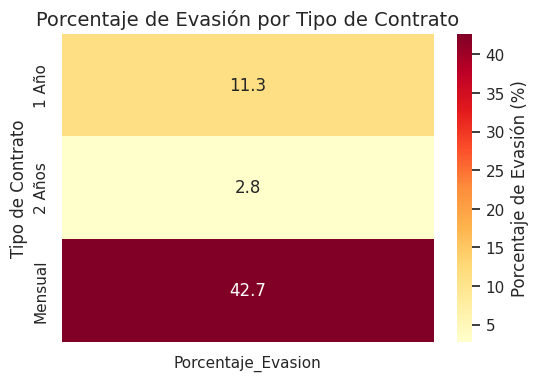

### 3.2 Método de Pago

* Realizando un análisis con los métodos de pago pudo notarse que las personas asociadas con usar Cheques electrónicos como forma de pago presentan una mayor evasión

* Así mismo las personas que realizar pagos con tarjeta de crédito son las que presentan un mejor porcentaje de evasión con respecto al resto

* Para este análisis de utilizo un grafico de barras para poder visualizar los resultados del análisis, logrando notar el contraste de evasión con cada método de pago


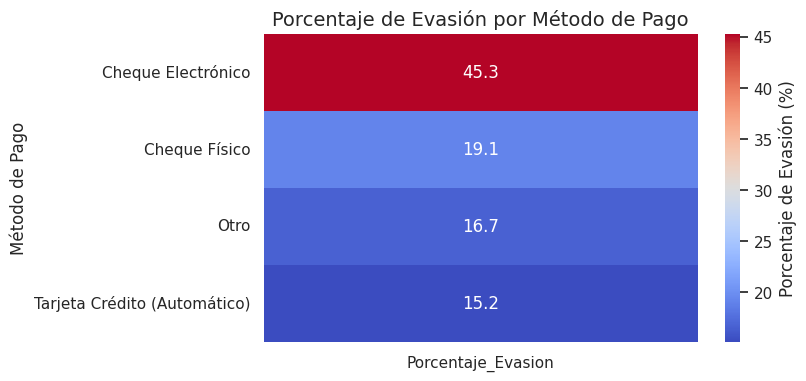

### 3.3. Tipo de Internet

* Se realiza un análisis en base a tipo de internet con relación a la evasión, teniendo como resultado que los clientes con internet de fibra óptica presentan una mayor tasa de evasión con respecto a los clientes con DSL

* Así mismo podemos observar que los clientes que no cuentan con internet tienen un porcentaje muy bajo


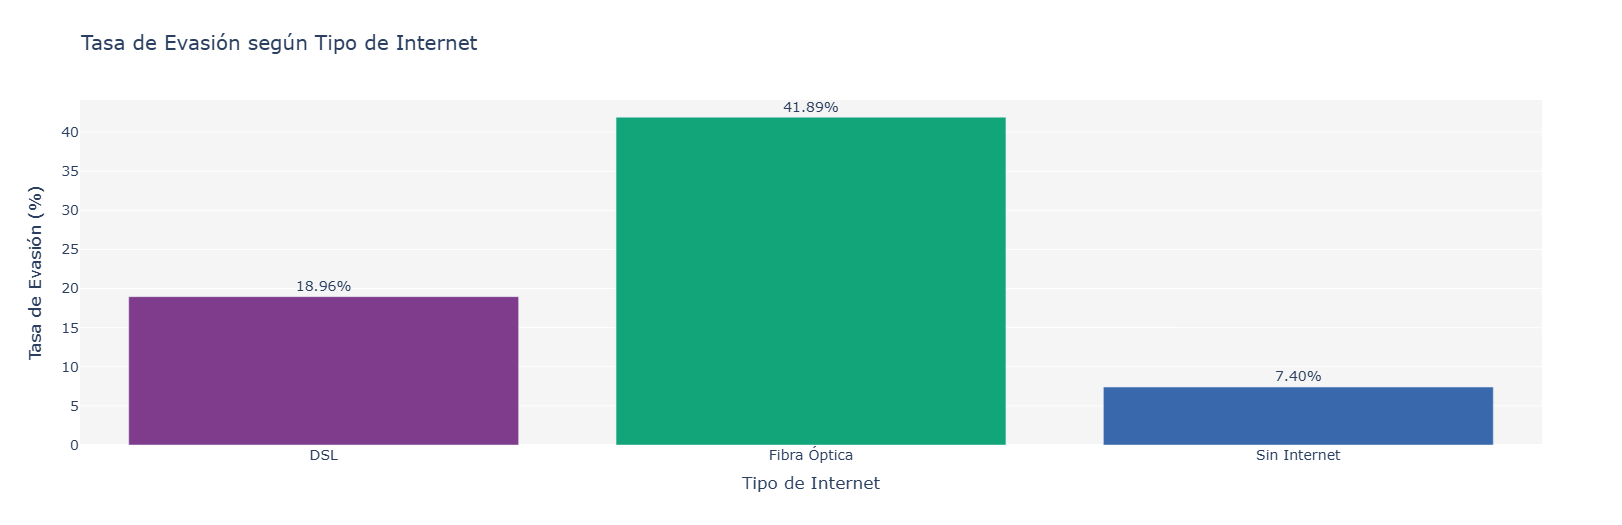

### 3.4. Adulto Mayor

* Analizando la relación de evasión con referente a si el cliente es adulto mayor o no, podemos observar que los adultos mayores presentan un porcentaje mayor de evasión a diferencia de los clientes que no son adultos mayores

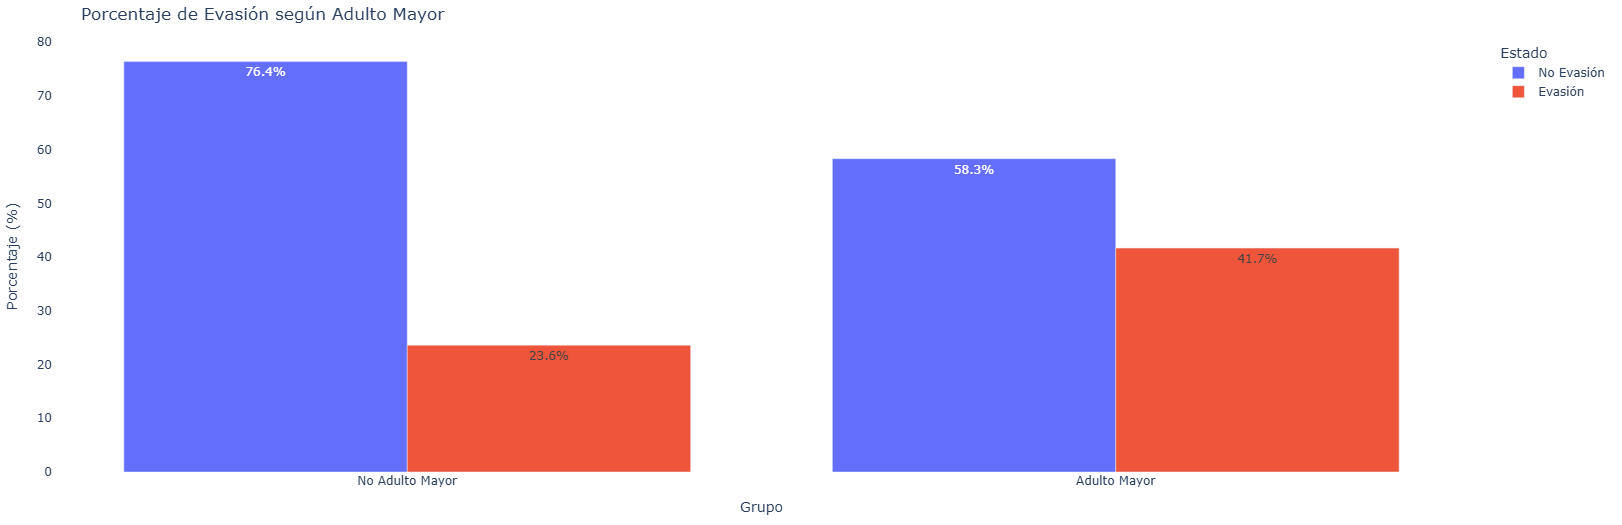

### 3.5. Servicios Adicionales

* Revisamos la relación de evasión con respecto a los servicios adicionales como lo son la Seguridad Online y Respaldo Online

* Se logra percibir que los clientes que no cuentan con estos servicios tienen a tener un mayor porcentaje de evasión


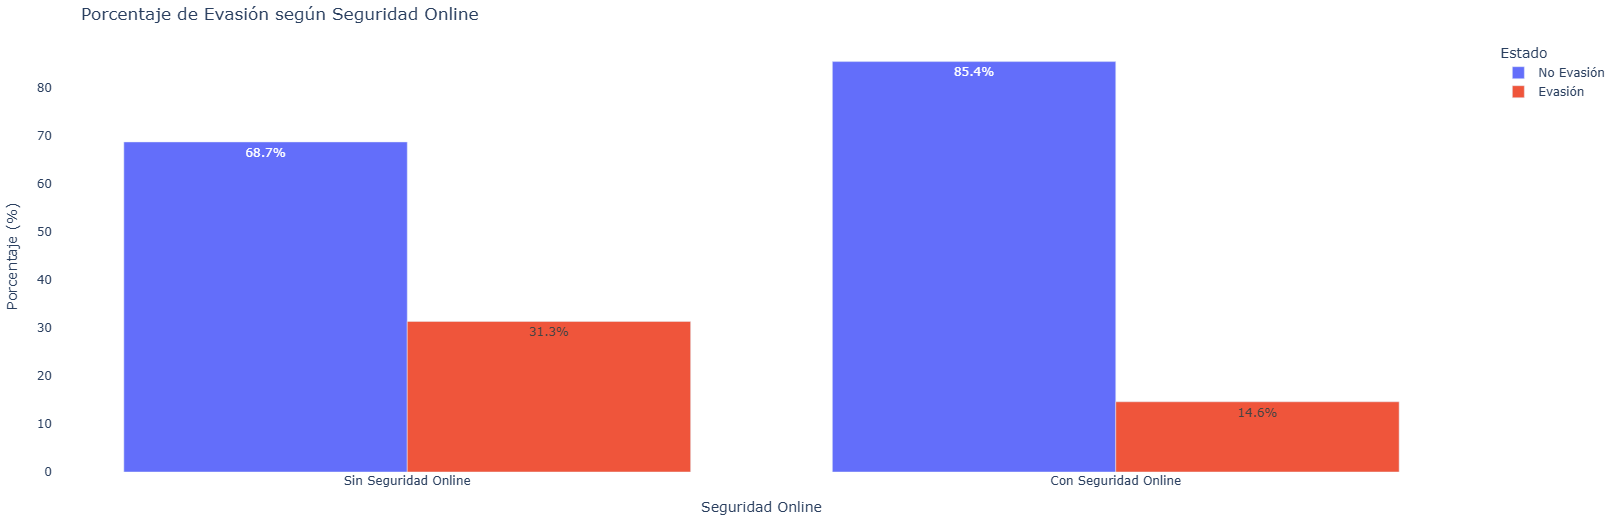

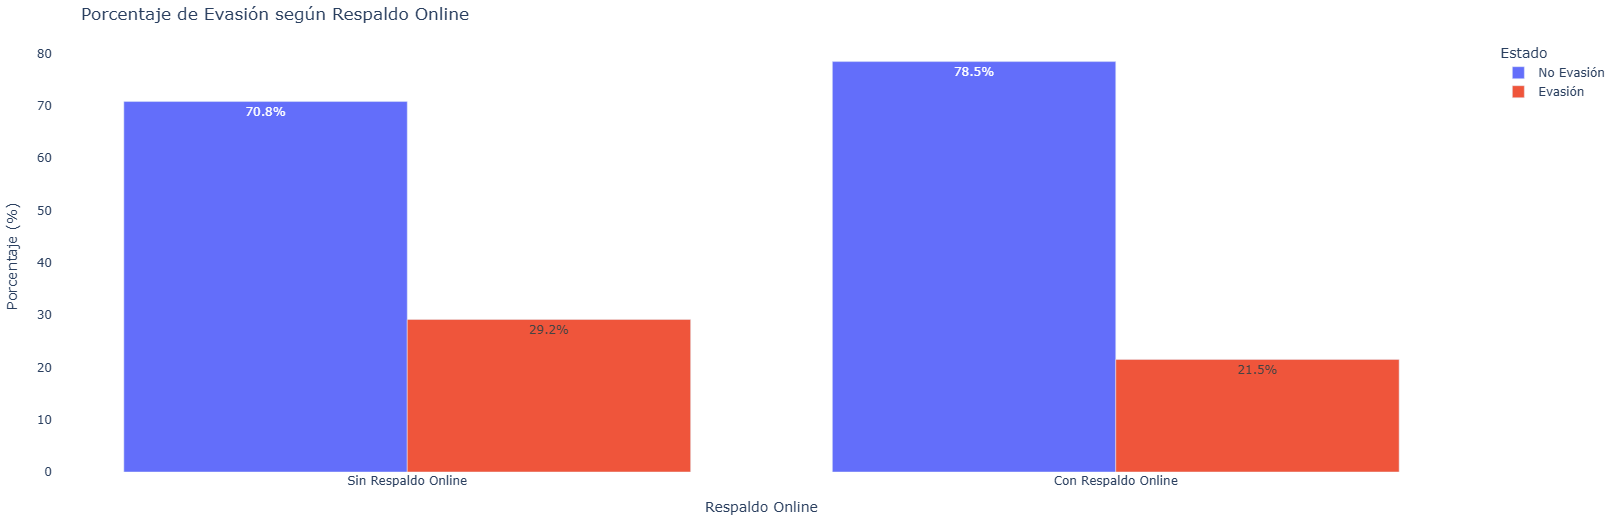

### 3.6. Variables Numéricas

Analizamos la relación de evasión con referente a las variables numéricas para poder visualizar cuales presentan un factor importante para determinar las causas de evasión de los cliente

1. Meses como Cliente



*   Los resultados nos muestran que los clientes con poca antigüedad presentan una mayor evasión, así mismo podemos notar que al pasar de los meses los clientes tienden a tener menor evasión.

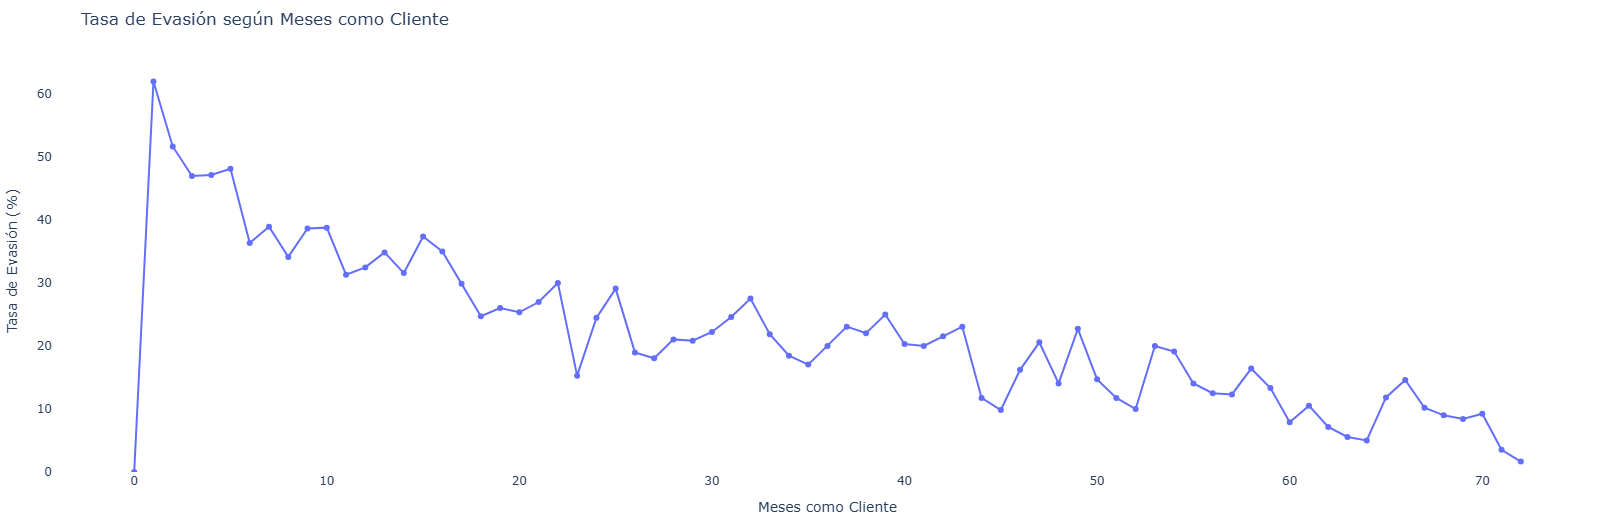

2. Cargo Mensual

*  Con el análisis de los cargos mensuales podemos notar que los clientes que evaden presentan cargos mas altos, lo cual podría ser un factor importante por la cual puede elevarse el porcentaje de evasión

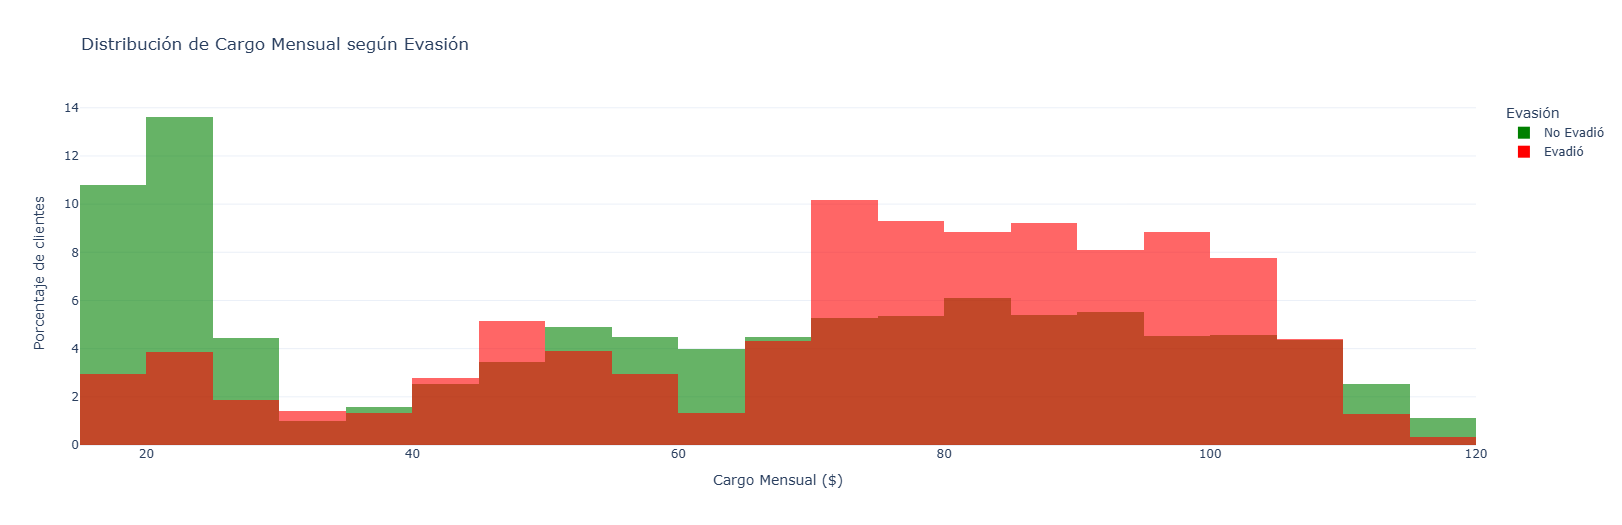

3.  Cargos Total

*  Revisando la relación de cargo totales con respecto a la evasión se obtiene que los clientes que tienen a evadir presentan cargos totales menores, con esto podemos determinar que los clientes tienden a irse antes de acumular mayores costos de los servicios

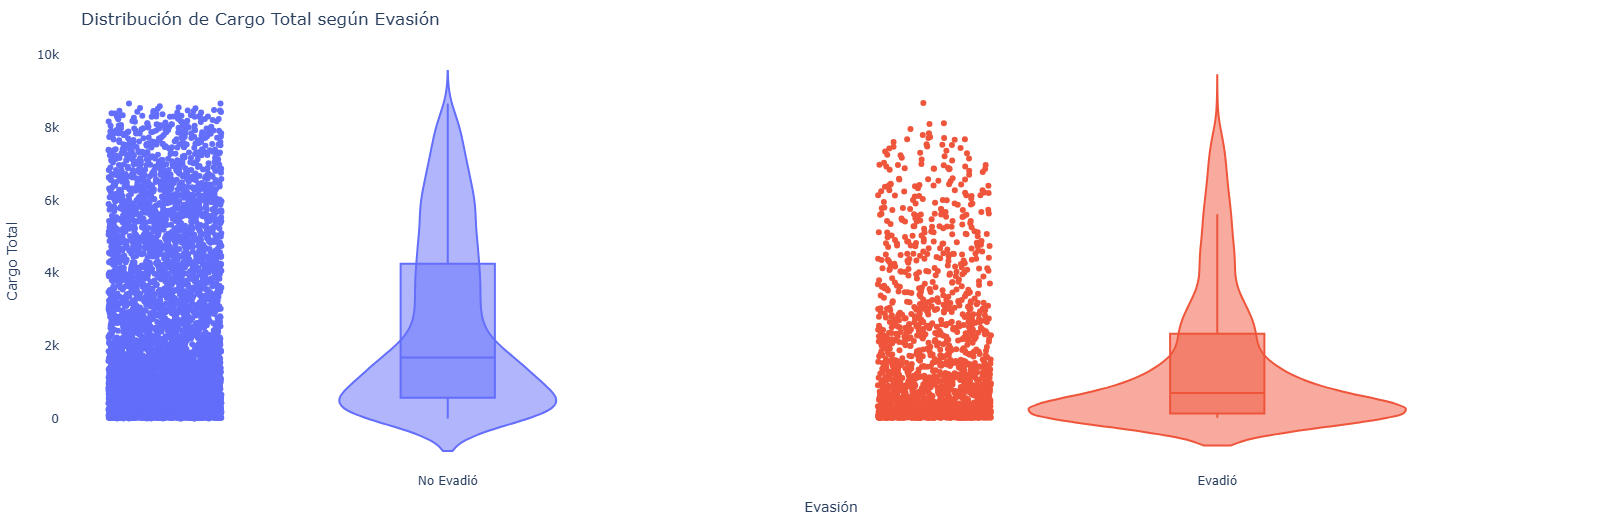


### 4. Conclusiones e Insights

*	Clientes con contratos mensuales y métodos de pago no automáticos son mayores predictores a evasión

*	Clientes que cuentan con internet de fibra óptica y cargos mensuales altos pueden presentar factores de insatisfacción de los clientes y por lo tanto llevar a evasión


*	Adultos mayores, pueden requerir una mayor atención para lograr una retención y evitar la evasión en ese segmento de clientes

*	Servicios adicionales parecen lograr retener a los clientes disminuyendo el porcentaje de evasión

*	La antigüedad de los clientes tiende a ser un factor de evasión por lo que los primeros meses puede ser un reto mantener a estos clientes.


### 5. Recomendaciones Estratégicas

1. Fomentar contratos a largo plazo


* Incentivar a los clientes a tener contratos a largo plazo podría ayudar a disminuir el porcentaje de evasión, crear atractivos como descuentos o beneficios exclusivos para clientes con contratos largos

* Crear un programa de fidelidad, en la cual los clientes puedan obtener beneficios desde los primeros meses para captar a los nuevos clientes y pasar la barrera de los primeros meses


2. Promover pagos automáticos

* Incentivar a los clientes a hacer uso de métodos de pago automáticos mediante algún incentivo o beneficios para los clientes que usen estos métodos de pago

3. Mejorar el servicio brindado de fibra óptica

* Mejorar la experiencia de los clientes que cuentan con fibra óptica ayudaría a disminuir la evasión de estos

* Soporte técnico proactivo, mantener el servicio siempre en buenas condiciones y eficiente para los clientes así como brindar ayuda oportuna a los clientes que cuenten con alguna falla o problema en su servicio


4.  Adultos mayores

* Crear un programa de atención personalizada para adultos mayores, donde la comunicación pueda ser clara para los clientes en este sector

* Crear una campaña especifica para adultos mayores promoviendo la atención personalizada que estos reciben


5. Servicios adicionales

* Promover con mayor eficiencia los servicios adicionales, así como transmitir a los clientes los beneficios que estos pueden tener.

* Crear una campaña de pruebas gratuitas de los servicios adicionales, los clientes experimentaran los beneficios de los servicios

* Crear ofertas de contratación de servicios adicionales en paquetes junto con otros servicios para aumentar la visión que los clientes de los beneficios que reciben con el valor